# Load GPU

Dikarenakan proses analisis ini termasuk dalam deep learning, maka dibutuhkan processor tambahan yakni GPU agar proses komputasi lebih cepat dan efektif.

Hal pertama yang dilakukan yakni mengimpor dan loading GPU yang ada pada Google Colaboratory.

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
5.7512162579999995
GPU (s):
0.07397853399999121
GPU speedup over CPU: 77x


#Load Drive

Dikarenakan dataset yang digunakan terdapat pada Drive, maka perlu melakukan import dan loading Drive.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install and Load Libraries

Melakukan install dan import libraries yang digunakan dalam project ini.

In [4]:
!pip install  visualkeras
!pip3 install ann_visualizer
!pip install graphviz
!pip install rarfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 4.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=9ea3a6dcff3e5f9dc36b7d638aa69ae4532366d99221a5304e82562610415a08
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.applications.efficientnet import preprocess_input, EfficientNetB0
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, subplots, show
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from torchvision.utils import make_grid
import keras
from glob import glob
import pandas as pd
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix
import visualkeras
import os
from tqdm import tqdm
import cv2
import matplotlib.cm as cm
from IPython.display import Image, display
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from rarfile import RarFile
from PIL import Image
from keras.models import load_model
from keras.preprocessing import image
import tensorflow as tf
import pickle

# Data Loading

Melakukan loading dataset yang ada.

In [6]:
# df = RarFile(r'/content/drive/My Drive/Colab Notebooks/Data Skripsi Fix.rar')
# df.extractall('/content/data')
# df.close()

Membagi dataset menjadi tiga bagian, yakni data latih, data validasi, dan data uji dengan perbandingan 8:1:1.

In [7]:
train_path = '/content/drive/MyDrive/Bangkit/Dataset2/Training New'
test_path = '/content/drive/MyDrive/Bangkit/Dataset2/Validation New'
val_path = '/content/drive/MyDrive/Bangkit/Dataset2/Validation New'

# Exploratory Data Analysis

Melakukan eksplorasi pada dataset yang ada.

Yang pertama yakni mengecek jumlah kelas yang ada.

In [8]:
numberOfClass = len(glob(train_path+"/*")) 
print("Number of Class: ",numberOfClass)

Number of Class:  5


Diperoleh terdapat 3 kelas dalam dataset.

Selanjutnya dilakukan pendefinisian untuk visualisasi sampel citra rontgen dada.

In [9]:
def sampleImage(sampe_image_path):
  img = load_img(sampe_image_path)
  x = img_to_array(img)
  print(x.shape)
  plt.imshow(img)
  plt.axis("off")
  plt.show()

Excellent

(2812, 2521, 3)


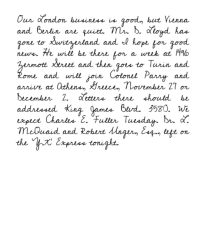

In [ ]:
sample_image_path = "/content/drive/MyDrive/Bangkit/Dataset/train/five/Untitled-1-Recovered-Recovered2_0000s_0000_Our London business is good, but Vienna and Berlin are quiet. M.jpg"
sampleImage(sample_image_path)

Citra di atas merupakan citra handwriting dengan ukuran piksel 2812 x 2521.

Great

(2808, 2521, 3)


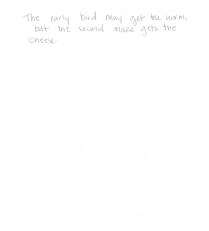

In [ ]:
sample_image_path = "/content/drive/MyDrive/Bangkit/Dataset/train/four/w0001_s03_pPHR_r01.png"
sampleImage(sample_image_path)

Citra di atas merupakan citra handwriting dengan ukuran piksel 2808 x 2521.

Selanjutnya dilakukan pengecekan kembali informasi dataset

In [10]:
dataDir = '/content/drive/MyDrive/Bangkit/Dataset2/Training New/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra handwriting",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 2622 citra handwriting 5 kelas pada dataset
Nama kelas: ['Poor', 'Uncertain', 'Okay', 'Great', 'Excellent']
Banyak kelas: [575, 558, 565, 429, 495]
Dimensi citra: 2521 x 2812


In [12]:
dataDir = '/content/drive/MyDrive/Bangkit/Dataset2/Validation New/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra handwriting",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 979 citra handwriting 5 kelas pada dataset
Nama kelas: ['Poor', 'Uncertain', 'Okay', 'Great', 'Excellent']
Banyak kelas: [78, 125, 378, 287, 111]
Dimensi citra: 2521 x 2811


In [13]:
dataDir = '/content/drive/MyDrive/Bangkit/Dataset2/Validation New/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra handwriting",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 979 citra handwriting 5 kelas pada dataset
Nama kelas: ['Poor', 'Uncertain', 'Okay', 'Great', 'Excellent']
Banyak kelas: [78, 125, 378, 287, 111]
Dimensi citra: 2521 x 2811


Selanjutnya melihat secara random 9 citra pada semua kelas.

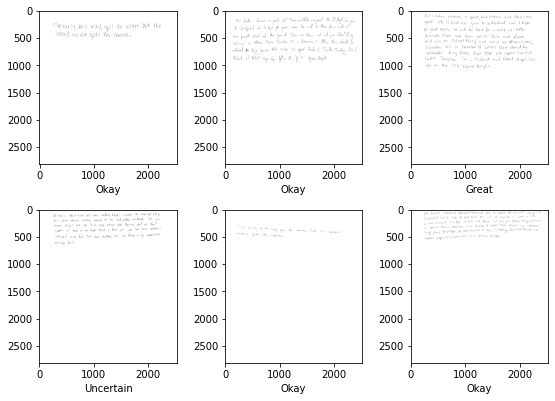

In [14]:
plt.subplots(1,3,figsize=(8,8))
for i,k in enumerate(np.random.randint(numTotal, size=6)):  
    im = Image.open(imageFilesList[k])                    
    arr = np.array(im)
    plt.subplot(3,3,i+1)
    plt.xlabel(classNames[imageClass[k]])
    plt.imshow(arr,cmap='gray',vmin=0,vmax=255)
plt.tight_layout()
plt.show()

## Balancing Training Data

### Poor

In [ ]:
from PIL import Image, ImageEnhance

tempDir = '/content/drive/MyDrive/Bangkit/Dataset/PoorTemp'
tempDir2 = '/content/drive/MyDrive/Bangkit/Dataset/PoorTemp2'
tempDir3 = '/content/drive/MyDrive/Bangkit/Dataset/PoorTemp3'
tempDir4 = '/content/drive/MyDrive/Bangkit/Dataset/PoorTemp4'
poorDir = '/content/drive/MyDrive/Bangkit/Dataset/Training/Poor'

#### tempDir

In [ ]:
for filename in os.listdir(poorDir):
    shutil.copy(os.path.join(poorDir, filename), os.path.join(tempDir, filename))

In [ ]:
for filename in os.listdir(tempDir):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited.png'
  # os.rename(filename, )
  # f = os.path.splitext(f)[0]
  # print(f)
  os.rename(os.path.join(tempDir, filename), os.path.join(tempDir, new_f))
    # f = os.path.join(poorDir, filename)
    # # checking if it is a file
    # if os.path.isfile(f):
    #     print(os.path.splitext(f)[0])
    # os.path.splitext(f)[0]
    


# for file in os.listdir(poorDir) :
#     f_img = poorDir+"/"+file
#     img = Image.open(f_img)
#     enhancer = ImageEnhance.Contrast(img)
#     factor = 1.5 #increase contrast
#     im_output = enhancer.enhance(factor)
#     im_output.save(Path(f_img).stem + "edited.png")

In [ ]:
count=0
for filename in os.listdir(tempDir):
  f = filename
  # print(f)
  count +=1
print(count)

135


In [ ]:
for filename in os.listdir(tempDir):
    # new_f_contrasted_name = os.path.splitext(f)[0] + '-contrasted.png'
    # new_f_contrasted = os.path.join(tempDir, new_f)
    f_img = os.path.join(tempDir, filename)
    # img = Image.open(f_img)
    
    # enhancer = ImageEnhance.Contrast(im)
    # factor = 1.5 #increase contrast
    # im_output = enhancer.enhance(factor)
    # # im_output.save(new_f_contrasted)
    # im_output.save(f_img)
    # # img.save(f_img)

    # f_img = f+"/"+file
    img = Image.open(f_img)

    # img = img.resize((2296,1724))
    enhancer = ImageEnhance.Contrast(img)
    factor = 1.5
    img = enhancer.enhance(factor)
    
    img.save(f_img)
    # print(f_img)

#### tempDir2

In [ ]:
for filename in os.listdir(poorDir):
  # print(filename)
  shutil.copy(os.path.join(poorDir, filename), os.path.join(tempDir2, filename))

In [ ]:
for filename in os.listdir(tempDir2):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited-sharpen.png'

  os.rename(os.path.join(tempDir2, filename), os.path.join(tempDir2, new_f))


In [ ]:
count=0
for filename in os.listdir(tempDir2):
  f = filename
  # print(f)
  count +=1
print(count)

135


In [ ]:
for filename in os.listdir(tempDir2):

    f_img = os.path.join(tempDir2, filename)

    img = Image.open(f_img)

    enhancer = ImageEnhance.Sharpness(img)
    factor = 1.5
    img = enhancer.enhance(factor)
    
    img.save(f_img)
    # print(f_img)

#### tempDir3

In [ ]:
for filename in os.listdir(poorDir):
    shutil.copy(os.path.join(poorDir, filename), os.path.join(tempDir3, filename))

In [ ]:
for filename in os.listdir(tempDir3):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited-contrasted2.png'

  os.rename(os.path.join(tempDir3, filename), os.path.join(tempDir3, new_f))


In [ ]:
count=0
for filename in os.listdir(tempDir3):
  f = filename
  # print(f)
  count +=1
print(count)

135


In [ ]:
for filename in os.listdir(tempDir3):

    f_img = os.path.join(tempDir3, filename)

    img = Image.open(f_img)

    enhancer = ImageEnhance.Contrast(img)
    factor = 1.25
    img = enhancer.enhance(factor)
    
    img.save(f_img)
    # print(f_img)

#### tempDir4

In [ ]:
for filename in os.listdir(poorDir):
    shutil.copy(os.path.join(poorDir, filename), os.path.join(tempDir4, filename))

In [ ]:
for filename in os.listdir(tempDir4):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited-brightened.png'

  os.rename(os.path.join(tempDir4, filename), os.path.join(tempDir4, new_f))


In [ ]:
count=0
for filename in os.listdir(tempDir4):
  f = filename
  # print(f)
  count +=1
print(count)

135


In [ ]:
for filename in os.listdir(tempDir4):

    f_img = os.path.join(tempDir4, filename)

    img = Image.open(f_img)

    enhancer = ImageEnhance.Contrast(img)
    factor = 1.25
    img = enhancer.enhance(factor)
    enhancer = Image.Enchance.Sharpness(img)
    factor = 1.25
    img = enhancer.enhance(factor)

    img.save(f_img)
    # print(f_img)

### Uncertain

In [ ]:
tempDirUncertain = '/content/drive/MyDrive/Bangkit/Dataset/UncertainTemp'
tempDirUncertain2 = '/content/drive/MyDrive/Bangkit/Dataset/UncertainTemp2'
uncertainDir = '/content/drive/MyDrive/Bangkit/Dataset/Training/Uncertain'

#### tempDirUncertain

In [ ]:
for filename in os.listdir(uncertainDir):
    shutil.copy(os.path.join(uncertainDir, filename), os.path.join(tempDirUncertain, filename))

In [ ]:
for filename in os.listdir(tempDirUncertain):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited.png'
  # os.rename(filename, )
  # f = os.path.splitext(f)[0]
  # print(f)
  os.rename(os.path.join(tempDirUncertain, filename), os.path.join(tempDirUncertain, new_f))

In [ ]:
count=0
for filename in os.listdir(tempDirUncertain):
  f = filename
  # print(f)
  count +=1
print(count)

217


In [ ]:
for filename in os.listdir(tempDirUncertain):
    f_img = os.path.join(tempDirUncertain, filename)
    img = Image.open(f_img)

    enhancer = ImageEnhance.Contrast(img)
    factor = 1.5
    img = enhancer.enhance(factor)
    
    img.save(f_img)


#### tempDirUncertain2

In [ ]:
for filename in os.listdir(uncertainDir):
    shutil.copy(os.path.join(uncertainDir, filename), os.path.join(tempDirUncertain2, filename))

In [ ]:
for filename in os.listdir(tempDirUncertain2):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited-sharpened.png'
  # os.rename(filename, )
  # f = os.path.splitext(f)[0]
  # print(f)
  os.rename(os.path.join(tempDirUncertain2, filename), os.path.join(tempDirUncertain2, new_f))

In [ ]:
count=0
for filename in os.listdir(tempDirUncertain2):
  f = filename
  # print(f)
  count +=1
print(count)

217


In [ ]:
for filename in os.listdir(tempDirUncertain2):

    f_img = os.path.join(tempDirUncertain2, filename)

    img = Image.open(f_img)

    enhancer = ImageEnhance.Sharpness(img)
    factor = 1.5
    img = enhancer.enhance(factor)
    
    img.save(f_img)
    # print(f_img)

### Excellent

In [ ]:
tempDirExcellent = '/content/drive/MyDrive/Bangkit/Dataset/ExcellentTemp'
tempDirExcellent2 = '/content/drive/MyDrive/Bangkit/Dataset/ExcellentTemp2'
excellentDir = '/content/drive/MyDrive/Bangkit/Dataset/Training/Excellent'

#### tempDirExcellent

In [ ]:
for filename in os.listdir(excellentDir):
    shutil.copy(os.path.join(excellentDir, filename), os.path.join(tempDirExcellent, filename))

In [ ]:
for filename in os.listdir(tempDirExcellent):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited.png'
  # os.rename(filename, )
  # f = os.path.splitext(f)[0]
  # print(f)
  os.rename(os.path.join(tempDirExcellent, filename), os.path.join(tempDirExcellent, new_f))

In [ ]:
count=0
for filename in os.listdir(tempDirExcellent):
  f = filename
  # print(f)
  count +=1
print(count)

193


In [ ]:
for filename in os.listdir(tempDirExcellent):
    f_img = os.path.join(tempDirExcellent, filename)
    img = Image.open(f_img)

    enhancer = ImageEnhance.Contrast(img)
    factor = 1.5
    img = enhancer.enhance(factor)
    
    img.save(f_img)


#### tempDirExcellent2

In [ ]:
for filename in os.listdir(excellentDir):
    shutil.copy(os.path.join(excellentDir, filename), os.path.join(tempDirExcellent2, filename))

In [ ]:
for filename in os.listdir(tempDirExcellent2):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited-sharpened.png'
  # os.rename(filename, )
  # f = os.path.splitext(f)[0]
  # print(f)
  os.rename(os.path.join(tempDirExcellent2, filename), os.path.join(tempDirExcellent2, new_f))

In [ ]:
count=0
for filename in os.listdir(tempDirExcellent2):
  f = filename
  # print(f)
  count +=1
print(count)

193


In [ ]:
for filename in os.listdir(tempDirExcellent2):
    f_img = os.path.join(tempDirExcellent2, filename)
    img = Image.open(f_img)

    enhancer = ImageEnhance.Sharpness(img)
    factor = 1.5
    img = enhancer.enhance(factor)
    
    img.save(f_img)


## Oversampling Dataset

In [ ]:
print(train_Poor)
print(train_Uncertain)
print(train_Excellent)

/content/drive/MyDrive/Bangkit/Dataset/Training/Poor
/content/drive/MyDrive/Bangkit/Dataset/Training/Uncertain
/content/drive/MyDrive/Bangkit/Dataset/Training/Excellent


In [ ]:
for filename in os.listdir(tempDir):
    shutil.copy(os.path.join(tempDir, filename), os.path.join(train_Poor, filename))
for filename in os.listdir(tempDir2):
    shutil.copy(os.path.join(tempDir2, filename), os.path.join(train_Poor, filename))
for filename in os.listdir(tempDir3):
    shutil.copy(os.path.join(tempDir3, filename), os.path.join(train_Poor, filename))
for filename in os.listdir(tempDir4):
    shutil.copy(os.path.join(tempDir4, filename), os.path.join(train_Poor, filename))

for filename in os.listdir(tempDirUncertain):
    shutil.copy(os.path.join(tempDirUncertain, filename), os.path.join(train_Uncertain, filename))
for filename in os.listdir(tempDirUncertain2):
    shutil.copy(os.path.join(tempDirUncertain2, filename), os.path.join(train_Uncertain, filename))

for filename in os.listdir(tempDirExcellent):
    shutil.copy(os.path.join(tempDirExcellent, filename), os.path.join(train_Excellent, filename))
for filename in os.listdir(tempDirExcellent2):
    shutil.copy(os.path.join(tempDirExcellent2, filename), os.path.join(train_Excellent, filename))

## Balancing Validation Data

### Excellent

In [ ]:
tempDirExcellentValidation = '/content/drive/MyDrive/Bangkit/Dataset/ExcellentValidationTemp'
excellentDirValidation = '/content/drive/MyDrive/Bangkit/Dataset/Initial Validation/Validation/Excellent'

#### Oversampling Excellent Validation

In [ ]:
for filename in os.listdir(excellentDirValidation):
    shutil.copy(os.path.join(excellentDirValidation, filename), os.path.join(tempDirExcellentValidation, filename))

In [ ]:
for filename in os.listdir(tempDirExcellentValidation):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited-darkened.png'
  # os.rename(filename, )
  # f = os.path.splitext(f)[0]
  # print(f)
  os.rename(os.path.join(tempDirExcellentValidation, filename), os.path.join(tempDirExcellentValidation, new_f))

In [ ]:
count=0
for filename in os.listdir(tempDirExcellentValidation):
  f = filename
  # print(f)
  count +=1
print(count)

42


In [ ]:
from PIL import Image, ImageEnhance
for filename in os.listdir(tempDirExcellentValidation):

    f_img = os.path.join(tempDirExcellentValidation, filename)

    img = Image.open(f_img)

    enhancer = ImageEnhance.Brightness(img)
    factor = 0.75
    img = enhancer.enhance(factor)
    
    img.save(f_img)
    # print(f_img)

### Apply Validation Samplings

In [ ]:
#belum di apply, generate aja

In [ ]:
#belum di apply, generate aja

## Balancing Test Data

### Excellent

In [ ]:
tempDirExcellentTesting = '/content/drive/MyDrive/Bangkit/Dataset/ExcellentTestingTemp'
excellentDirTesting = '/content/drive/MyDrive/Bangkit/Dataset/Initial Validation/Testing/Excellent'

#### Oversampling Excellent Test

In [ ]:
for filename in os.listdir(excellentDirTesting):
    shutil.copy(os.path.join(excellentDirTesting, filename), os.path.join(tempDirExcellentTesting, filename))

In [ ]:
for filename in os.listdir(tempDirExcellentTesting):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited-darkened.png'
  # os.rename(filename, )
  # f = os.path.splitext(f)[0]
  # print(f)
  os.rename(os.path.join(tempDirExcellentTesting, filename), os.path.join(tempDirExcellentTesting, new_f))

In [ ]:
count=0
for filename in os.listdir(tempDirExcellentTesting):
  f = filename
  # print(f)
  count +=1
print(count)

41


In [ ]:
for filename in os.listdir(tempDirExcellentTesting):

    f_img = os.path.join(tempDirExcellentTesting, filename)

    img = Image.open(f_img)

    enhancer = ImageEnhance.Brightness(img)
    factor = 0.75
    img = enhancer.enhance(factor)
    
    img.save(f_img)
    # print(f_img)

### Apply Test Samplings

In [ ]:
#belum di apply, generate aja
count=0
for filename in os.listdir('/content/drive/MyDrive/Bangkit/Dataset/Great'):
  f = filename
  # print(f)
  count +=1
print(count)

716


In [ ]:
#belum di apply, generate aja

## Cek yang udah ditambal

In [ ]:
dataDir = '/content/drive/MyDrive/Bangkit/Dataset/Training/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra handwriting",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 3066 citra handwriting 5 kelas pada dataset
Nama kelas: ['Poor', 'Uncertain', 'Okay', 'Great', 'Excellent']
Banyak kelas: [675, 651, 660, 501, 579]
Dimensi citra: 2521 x 2815


In [ ]:
dataDir = '/content/drive/MyDrive/Bangkit/Dataset/Initial Validation/Validation/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra handwriting",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 368 citra handwriting 5 kelas pada dataset
Nama kelas: ['Poor', 'Uncertain', 'Okay', 'Great', 'Excellent']
Banyak kelas: [29, 47, 142, 108, 42]
Dimensi citra: 2521 x 2818


In [ ]:
dataDir = '/content/drive/MyDrive/Bangkit/Dataset/Initial Validation/Testing/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra handwriting",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 365 citra handwriting 5 kelas pada dataset
Nama kelas: ['Poor', 'Uncertain', 'Okay', 'Great', 'Excellent']
Banyak kelas: [29, 47, 141, 107, 41]
Dimensi citra: 2521 x 2811


# Data Preprocessing

Data processing pertama yang dilakukan yakni augmentasi data pada data latih, seperti zoom range, horizontal flip, dan shear range. Kemudian merubah dimensi citra menjadi 224 x 224 piksel.

In [15]:
train_data_gen = ImageDataGenerator(brightness_range=[0.7,1.0],
                                    zoom_range=[1.0,1.7],
                                    preprocessing_function= preprocess_input
                                    )

train = train_data_gen.flow_from_directory(directory= train_path,
                                           color_mode='grayscale', 
                                           target_size=(224,224)
                                           )

Found 2622 images belonging to 5 classes.


In [16]:
train.class_indices

{'Excellent': 0, 'Great': 1, 'Okay': 2, 'Poor': 3, 'Uncertain': 4}

Pada data validasi juga dilakukan perubahan dimensi citra menjadi 224 x 224 piksel

In [17]:
validation_data_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

valid = validation_data_gen.flow_from_directory(directory= val_path,
                                                color_mode='grayscale', 
                                                target_size=(224,224)
                                                )

Found 979 images belonging to 5 classes.


Pada data uji juga dilakukan perubahan dimensi citra menjadi 224 x 224 piksel

In [18]:
test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input )

test = train_data_gen.flow_from_directory(directory= test_path ,
                                          color_mode='grayscale', 
                                          target_size=(224,224), 
                                          shuffle= False
                                          )

Found 979 images belonging to 5 classes.


Berikut merupakan visualisasi dari augmentasi data yang dilakukan pada data latih.

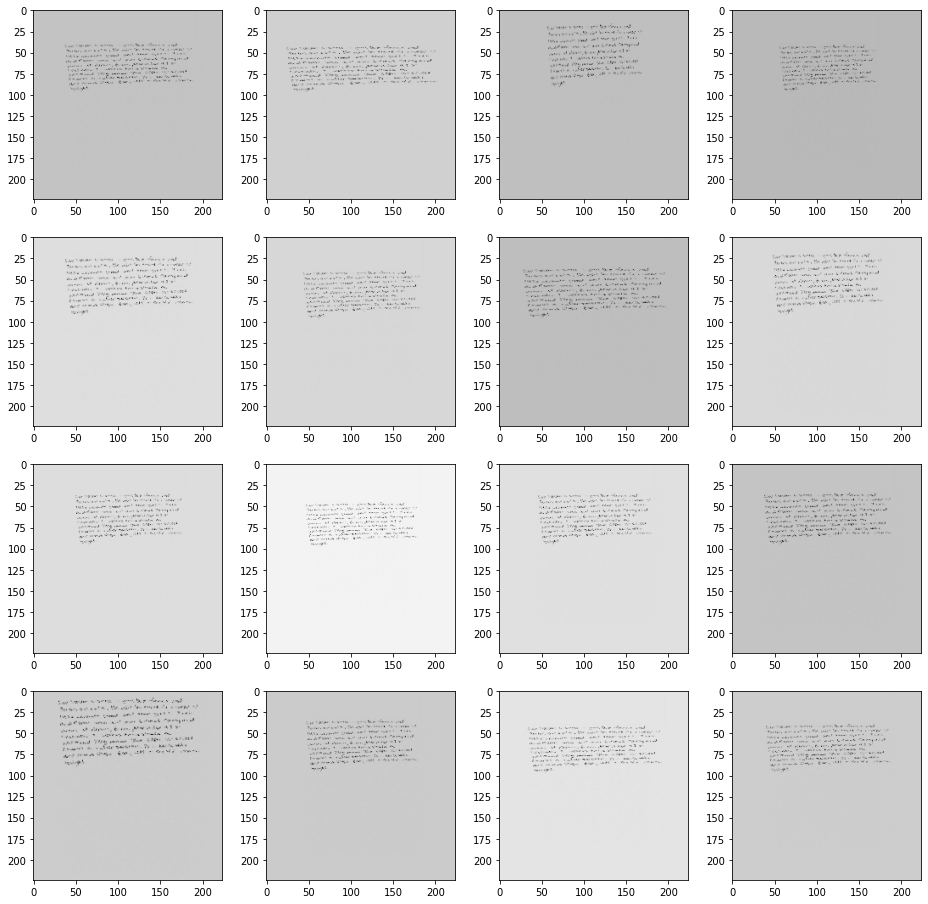

In [20]:
image_path = "/content/drive/MyDrive/Bangkit/Dataset2/Training New/Great/w0003_s02_pLND_r01.png"
img = keras.preprocessing.image.load_img(image_path, target_size= (224,224))
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)



pic = train_data_gen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(16, 16))

for i in range(1,17):
   plt.subplot(4, 4, i)
   batch = pic.next()
   image_ = batch[0].astype('uint8')
   plt.imshow(image_)
plt.show()

In [21]:
class_type = {0:'one',  1 : 'two', 2:'three', 3:'four',4:'five'}

In [22]:
labels = ['one','two','three', 'four', 'five']

# Model Defining

Pada penelitian ini menggunakan EfficientNet B0 sebagai pre-trained model dengan tidak mem-freeze lapisan-lapisan yang ada. Hal ini guna memperbarui parameter.

In [36]:
efficientNet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [37]:
for layer in efficientNet.layers[:-16]:         
  layer.trainable = False

## Layers of the EfficientNet

In [38]:
efficientNet.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                     

## Visualize of the EfficientNet

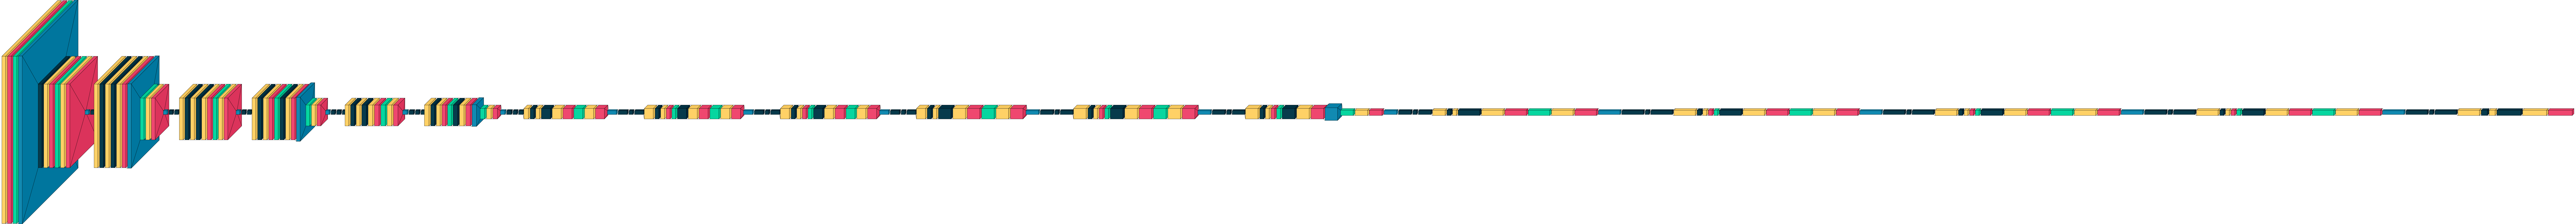

In [39]:
visualkeras.layered_view(efficientNet)

In [40]:
x = Flatten()(efficientNet.output)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(numberOfClass,activation='softmax')(x)

# creating our model.
model = tf.keras.models.Model(inputs=efficientNet.input, outputs = x)

Layers of the Model

In [41]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                            

## Visualize of the Model

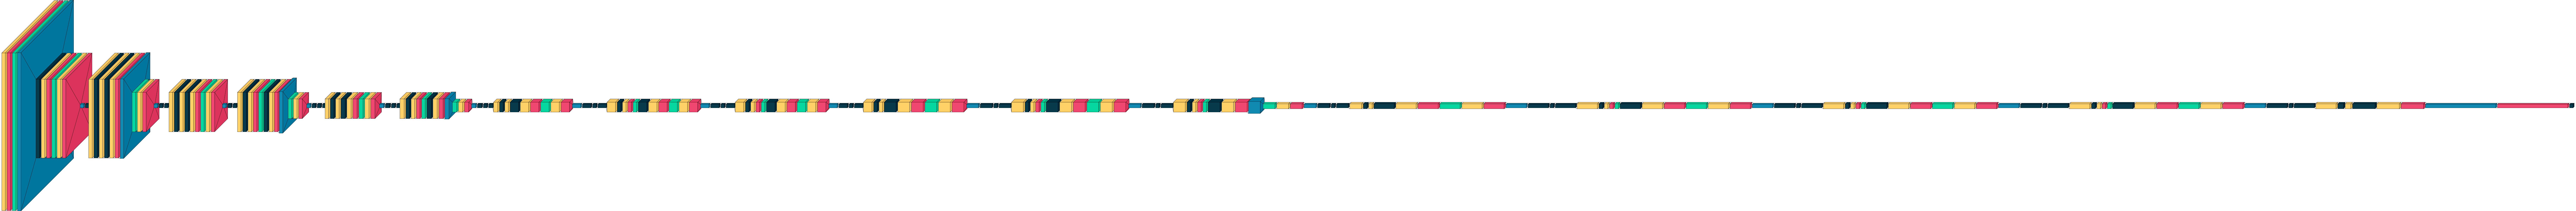

In [42]:
visualkeras.layered_view(model)

Selanjutnya dilakukan pendefinisian model dengan optimasi Adam dan optimasi SGD. Fungsi loss yang digunakan yakni categorical crossentropy dan metrics akurasi.

## Adam Optimizer

In [43]:
modela1 = model
opt_a1 = tf.keras.optimizers.Adam(learning_rate=1e-2)
modela1.compile(loss='categorical_crossentropy',
              optimizer = opt_a1, 
              metrics= ['accuracy'])

In [44]:
modela2 = model
opt_a2 = tf.keras.optimizers.Adam(learning_rate=1e-3)
modela2.compile(loss='categorical_crossentropy',
              optimizer = opt_a2, 
              metrics= ['accuracy'])

## SGD

In [45]:
models1 = model
opt_s1 = tf.keras.optimizers.SGD(learning_rate=1e-2)
models1.compile(loss='categorical_crossentropy',
              optimizer = opt_s1, 
              metrics= ['accuracy'])

In [46]:
models2 = model
opt_s2 = tf.keras.optimizers.SGD(learning_rate=1e-3)
models2.compile(loss='categorical_crossentropy',
              optimizer = opt_s2, 
              metrics= ['accuracy'])

# Model Training

Selanjutnya dilakukan model training.

## Adam

In [47]:
es = EarlyStopping(monitor= "val_accuracy" , 
                   min_delta= 0.001, 
                   patience= 15, 
                   verbose=1)
mc = ModelCheckpoint(filepath="Modela1_Best.h5", 
                     monitor="val_accuracy", 
                     verbose=1, 
                     save_best_only= True)
hist_a1 = modela1.fit(train,
                 epochs =300, 
                 verbose=1, 
                 batch_size=16,
                 validation_data=valid,
                 validation_steps=10,
                 callbacks=[es,mc]
                 )

Epoch 1/300
82/82 [==============================] - ETA: 0s - loss: 2.0630 - accuracy: 0.2906
Epoch 1: val_accuracy improved from -inf to 0.30000, saving model to Modela1_Best.h5
82/82 [==============================] - 125s 1s/step - loss: 2.0630 - accuracy: 0.2906 - val_loss: 1.5884 - val_accuracy: 0.3000
Epoch 2/300
82/82 [==============================] - ETA: 0s - loss: 1.7856 - accuracy: 0.3703
Epoch 2: val_accuracy improved from 0.30000 to 0.37187, saving model to Modela1_Best.h5
82/82 [==============================] - 110s 1s/step - loss: 1.7856 - accuracy: 0.3703 - val_loss: 1.4950 - val_accuracy: 0.3719
Epoch 3/300
82/82 [==============================] - ETA: 0s - loss: 1.6564 - accuracy: 0.4096
Epoch 3: val_accuracy did not improve from 0.37187
82/82 [==============================] - 109s 1s/step - loss: 1.6564 - accuracy: 0.4096 - val_loss: 1.6047 - val_accuracy: 0.2781
Epoch 4/300
82/82 [==============================] - ETA: 0s - loss: 1.5494 - accuracy: 0.4211
Epoch 

In [48]:
es = EarlyStopping(monitor= "val_accuracy" , 
                   min_delta= 0.001, 
                   patience= 9, 
                   verbose=1)
mc = ModelCheckpoint(filepath="Modela2_Best.h5", 
                     monitor="val_accuracy", 
                     verbose=1, 
                     save_best_only= True)
hist_a2 = modela2.fit(train,
                 epochs =300, 
                 verbose=1, 
                 batch_size=16,
                 validation_data=valid,
                 validation_steps=10,
                 callbacks=[es,mc]
                 )

Epoch 1/300
82/82 [==============================] - ETA: 0s - loss: 0.9684 - accuracy: 0.6213
Epoch 1: val_accuracy improved from -inf to 0.41875, saving model to Modela2_Best.h5
82/82 [==============================] - 104s 1s/step - loss: 0.9684 - accuracy: 0.6213 - val_loss: 1.3520 - val_accuracy: 0.4187
Epoch 2/300
82/82 [==============================] - ETA: 0s - loss: 1.0046 - accuracy: 0.6060
Epoch 2: val_accuracy did not improve from 0.41875
82/82 [==============================] - 103s 1s/step - loss: 1.0046 - accuracy: 0.6060 - val_loss: 1.5844 - val_accuracy: 0.3313
Epoch 3/300
82/82 [==============================] - ETA: 0s - loss: 0.9808 - accuracy: 0.6056
Epoch 3: val_accuracy did not improve from 0.41875
82/82 [==============================] - 104s 1s/step - loss: 0.9808 - accuracy: 0.6056 - val_loss: 1.4184 - val_accuracy: 0.4094
Epoch 4/300
82/82 [==============================] - ETA: 0s - loss: 1.0050 - accuracy: 0.6083
Epoch 4: val_accuracy did not improve from 

## SGD

In [49]:
es = EarlyStopping(monitor= "val_accuracy" , 
                   min_delta= 0.001, 
                   patience= 9, 
                   verbose=1)
mc = ModelCheckpoint(filepath="Models1_Best.h5", 
                     monitor="val_accuracy", 
                     verbose=1, 
                     save_best_only= True)
hist_s1 = models1.fit(train,
                 epochs =300, 
                 verbose=1, 
                 batch_size=16,
                 validation_data=valid,
                 validation_steps=10,
                 callbacks=[es,mc]
                 )

Epoch 1/300
82/82 [==============================] - ETA: 0s - loss: 0.9505 - accuracy: 0.6159
Epoch 1: val_accuracy improved from -inf to 0.35938, saving model to Models1_Best.h5
82/82 [==============================] - 106s 1s/step - loss: 0.9505 - accuracy: 0.6159 - val_loss: 1.4947 - val_accuracy: 0.3594
Epoch 2/300
82/82 [==============================] - ETA: 0s - loss: 0.9394 - accuracy: 0.6316
Epoch 2: val_accuracy improved from 0.35938 to 0.37813, saving model to Models1_Best.h5
82/82 [==============================] - 103s 1s/step - loss: 0.9394 - accuracy: 0.6316 - val_loss: 1.6536 - val_accuracy: 0.3781
Epoch 3/300
82/82 [==============================] - ETA: 0s - loss: 0.9512 - accuracy: 0.6278
Epoch 3: val_accuracy did not improve from 0.37813
82/82 [==============================] - 103s 1s/step - loss: 0.9512 - accuracy: 0.6278 - val_loss: 1.5875 - val_accuracy: 0.3781
Epoch 4/300
82/82 [==============================] - ETA: 0s - loss: 0.9192 - accuracy: 0.6346
Epoch 

In [50]:
es = EarlyStopping(monitor= "val_accuracy" , 
                   min_delta= 0.001, 
                   patience= 9, 
                   verbose=1)
mc = ModelCheckpoint(filepath="Models2_Best.h5", 
                     monitor="val_accuracy", 
                     verbose=1, 
                     save_best_only= True)
hist_s2 = models2.fit(train,
                 epochs =300, 
                 verbose=1, 
                 batch_size=16,
                 validation_data=valid,
                 validation_steps=10,
                 callbacks=[es,mc]
                 )

Epoch 1/300
82/82 [==============================] - ETA: 0s - loss: 0.8570 - accuracy: 0.6640
Epoch 1: val_accuracy improved from -inf to 0.40625, saving model to Models2_Best.h5
82/82 [==============================] - 104s 1s/step - loss: 0.8570 - accuracy: 0.6640 - val_loss: 1.4673 - val_accuracy: 0.4062
Epoch 2/300
82/82 [==============================] - ETA: 0s - loss: 0.8154 - accuracy: 0.6793
Epoch 2: val_accuracy did not improve from 0.40625
82/82 [==============================] - 103s 1s/step - loss: 0.8154 - accuracy: 0.6793 - val_loss: 1.4818 - val_accuracy: 0.4062
Epoch 3/300
82/82 [==============================] - ETA: 0s - loss: 0.8511 - accuracy: 0.6720
Epoch 3: val_accuracy did not improve from 0.40625
82/82 [==============================] - 104s 1s/step - loss: 0.8511 - accuracy: 0.6720 - val_loss: 1.5141 - val_accuracy: 0.3844
Epoch 4/300
82/82 [==============================] - ETA: 0s - loss: 0.8319 - accuracy: 0.6712
Epoch 4: val_accuracy did not improve from 

# Visualize of the Graph

Dari hasil model training, kemudian dilakukan visualisasi dengan grafik terhadap hasil validasi loss dan validasi accuracy pada masing-masing model.

In [ ]:
print(hist_a1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


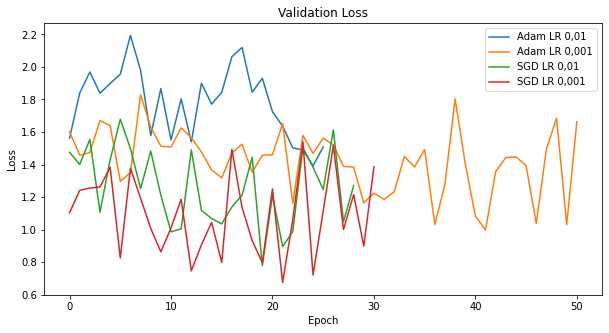

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_a1.history["val_loss"],label = "Adam LR 0,01")
plt.plot(hist_a2.history["val_loss"],label = "Adam LR 0,001")
plt.plot(hist_s1.history["val_loss"],label = "SGD LR 0,01")
plt.plot(hist_s2.history["val_loss"],label = "SGD LR 0,001")
plt.title("Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

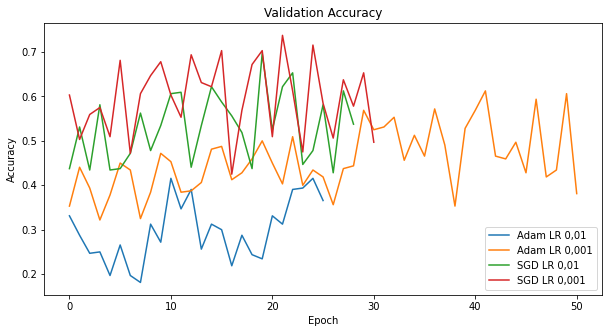

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_a1.history["val_accuracy"],label = "Adam LR 0,01")
plt.plot(hist_a2.history["val_accuracy"],label = "Adam LR 0,001")
plt.plot(hist_s1.history["val_accuracy"],label = "SGD LR 0,01")
plt.plot(hist_s2.history["val_accuracy"],label = "SGD LR 0,001")
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Adam

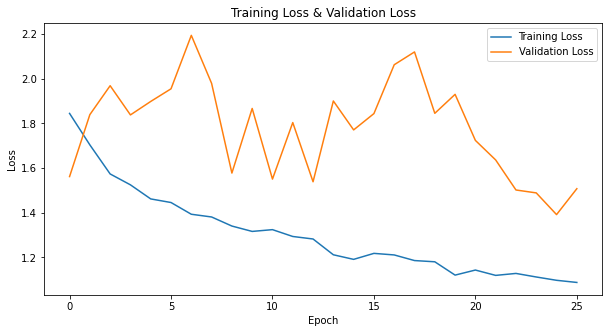

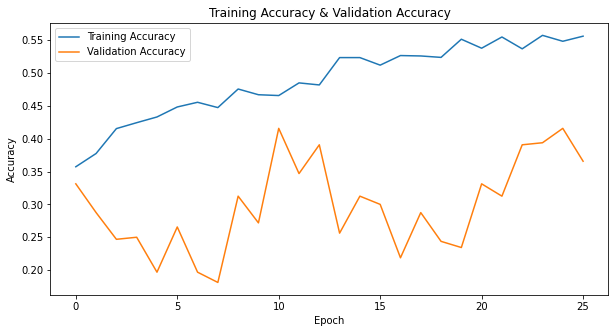

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_a1.history["loss"],label = "Training Loss")
plt.plot(hist_a1.history["val_loss"],label = "Validation Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(hist_a1.history["accuracy"],label = "Training Accuracy")
plt.plot(hist_a1.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

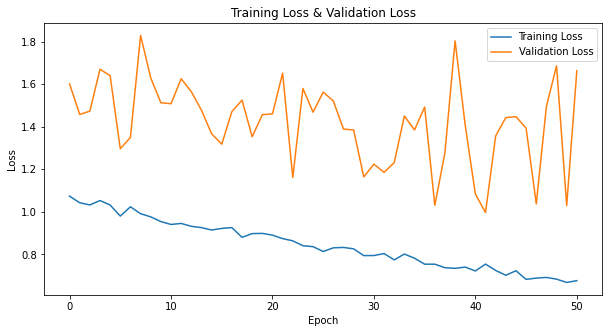

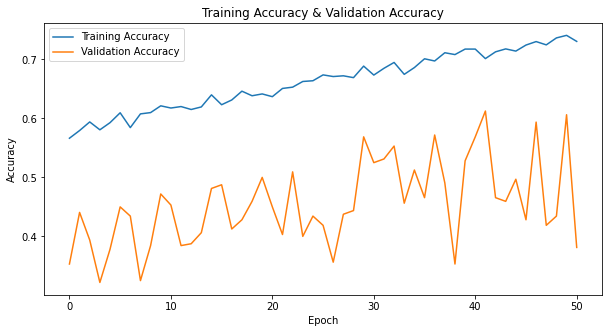

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_a2.history["loss"],label = "Training Loss")
plt.plot(hist_a2.history["val_loss"],label = "Validation Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(hist_a2.history["accuracy"],label = "Training Accuracy")
plt.plot(hist_a2.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## SGD

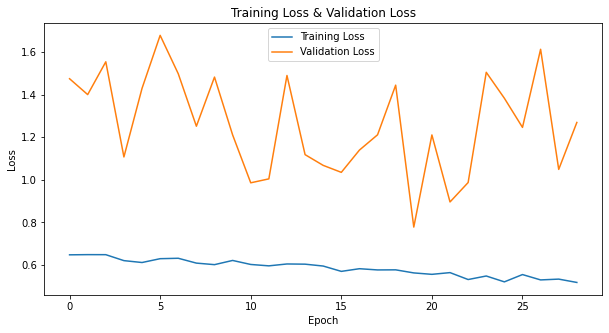

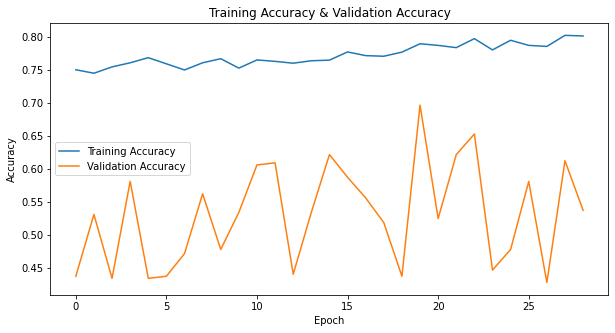

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_s1.history["loss"],label = "Training Loss")
plt.plot(hist_s1.history["val_loss"],label = "Validation Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(hist_s1.history["accuracy"],label = "Training Accuracy")
plt.plot(hist_s1.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

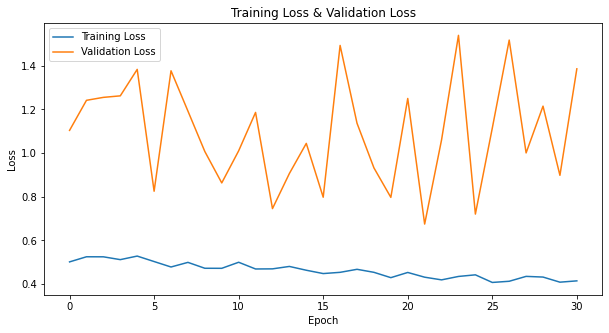

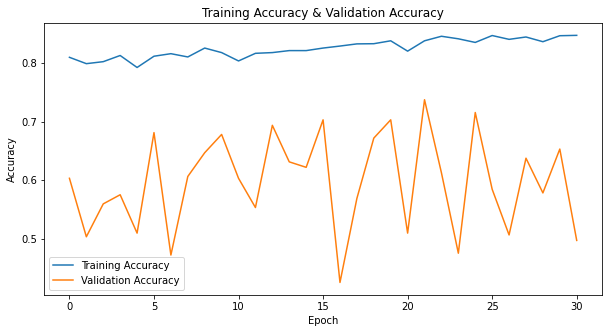

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_s2.history["loss"],label = "Training Loss")
plt.plot(hist_s2.history["val_loss"],label = "Validation Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(hist_s2.history["accuracy"],label = "Training Accuracy")
plt.plot(hist_s2.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Best Model

Diperoleh model yang sangat baik yaitu EfficientNet B0 dengan Adam optimizer dan learning rate 0,001. Kemudian load model untuk dilakukan evaluasi model.

In [ ]:
modelf = load_model("Models2_Best (1).h5")

In [ ]:
modelf.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                            

# Model Evaluation

Selanjutnya melakukan evaluasi model menggunakan data uji.

In [ ]:
predictions = modelf.predict_generator(test)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1) 

true_classes = test.classes
class_labels = list(test.class_indices.keys()) 

In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

              precision    recall  f1-score   support

        five       0.96      0.80      0.87       288
        four       0.73      0.90      0.81       739
         one       0.96      0.77      0.85       196
       three       0.86      0.80      0.83       954
         two       0.82      0.80      0.81       320

    accuracy                           0.83      2497
   macro avg       0.87      0.81      0.83      2497
weighted avg       0.84      0.83      0.83      2497



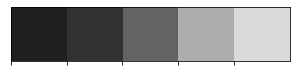

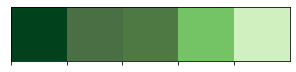

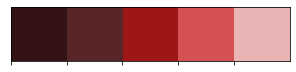

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

[[229  38   0  17   4]
 [  5 664   1  60   9]
 [  0  21 151  17   7]
 [  5 145   5 764  35]
 [  0  37   1  26 256]]


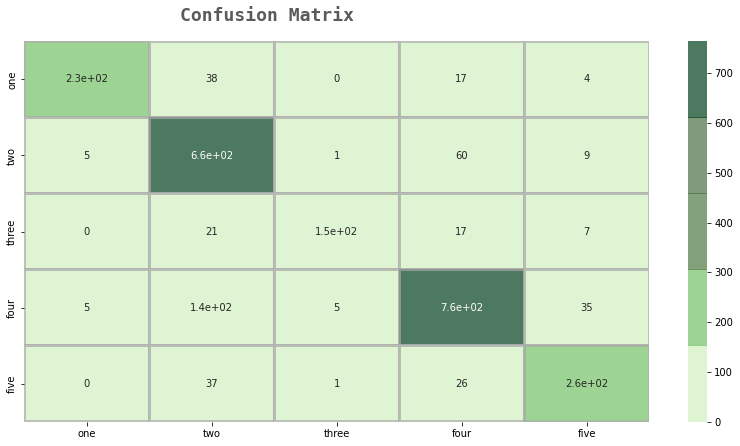

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))

sns.heatmap(confusion_matrix(true_classes, predicted_classes),
            ax=ax,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            cmap=colors_green[::-1],
            alpha=0.7,
            linewidths=2,
            linecolor=colors_dark[3]
            )

fig.text(s='Confusion Matrix',
         size=18,
         fontweight='bold',
         fontname='monospace',
         color=colors_dark[1],
         y=0.92,
         x=0.28,
         alpha=0.8)
print(confusion_matrix(true_classes, predicted_classes))
plt.show()

In [ ]:
def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )
  
  return img

Upload Gambar

In [ ]:
from google.colab import files
from keras.preprocessing import image

In [ ]:
train.class_indices

{'five': 0, 'four': 1, 'one': 2, 'three': 3, 'two': 4}

Saving Untitled-1-Recovered-Recovered2_0016s_0000_Our London business is good, but Vienna and Berlin are quiet. M.jpg to Untitled-1-Recovered-Recovered2_0016s_0000_Our London business is good, but Vienna and Berlin are quiet. M.jpg
one 0.9998754


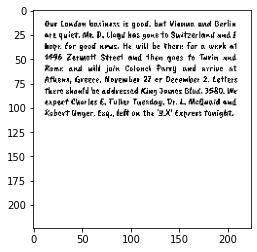

In [ ]:
def predict(image_upload):
  for fn in image_upload.keys():
    # predicting images
    path = fn
    img = image.load_img(path, target_size=(224,224))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    images = np.vstack([x])
    classes = modelf.predict(images, batch_size=10) 
    print( labels[np.argmax(classes)], np.max(classes) )

image_test = files.upload()
predict(image_test)

# Save Model

Selanjutnya menyimpan model yang dipilih untuk selanjutnya dilakukan deployment

In [ ]:
modelf.save("model_c2.h5")